# Context

Let’s take a close look at what the `context` is and how you can use it.
* The `context` variable is passed into every step definition, so all of the step functions that you write will have a variable called `context` as the first argument.
* You can think of it as a **container** or a bag to put stuff in, take stuff out, and pass it around.
* **It exists for the duration of the entire feature file and all of the steps.**
* **Every step called from the feature file will share the same `context`.**
* That lifespan makes context useful for passing information from one step to the next--or any future step that might need that information.


# Context example

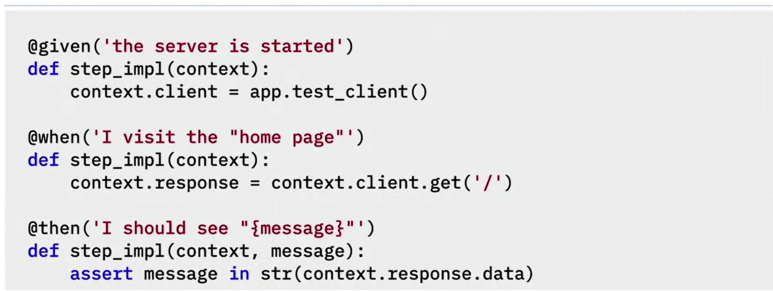

Let’s discuss some uses for the `context`.
* This example uses the Python Flask test client instead of Selenium.
* It shows you **how you can pass variables around from step to step using the context**.
* The first step in this file is **“Given the server is started”**. 
* This one line of code gets a test client from the Flask app and stores it in a `context` variable called `context.client`.
* Now any future step can get the test client simply by referencing `context.client`.
* The next step does just that.

It calls a `get()` method on the `context.client` to get the **root URL** of the application under test.
* It stored the results from that call in another `context` variable called `context.response`.
* Now any other step that needs to inspect the response of this `get()` request can find it in `context.response`.
* As you may have guessed, the next step function does exactly that.
* It references the data attribute of `context.response` and `asserts` that the message string passed into the function can be found somewhere in the data.

This is one example of how you can pass data from one step to the next by storing it in the context.


# Clipboard simulation

This next example simulates a clipboard.

Occasionally, you need to copy information from one field and paste it into another, but unfortunately, **Selenium doesn’t support clipboards**.

This is a little trick that is used to simulate copy-and-paste using a clipboard.

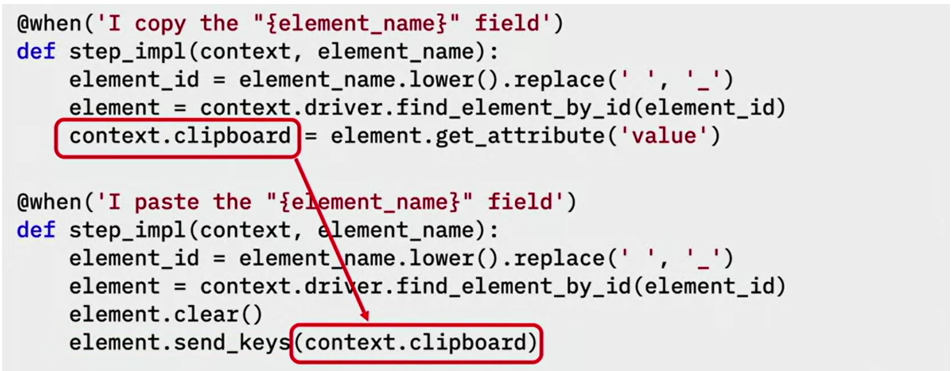

The first step is **“I copy the element_name field”**.
* This step uses a **variable substitution**, which is a way to pass in an element name that will be used as the source of the copy.
* The first line in this step **calculates the element ID** for that name.
* The second line makes a call to `context.driver.find_element_by_ID`, passing in the **element ID** to get the actual element.
* The third line calls the `get_attribute()` on that element requesting the value, and here’s where the copy happens.
* It stores that value in a variable called `context.clipboard`.
* We could have called it anything, but I thought that **“clipboard”** was appropriate.
* Now, any future step can inspect `context.clipboard` and see if anything has been copied there.


Next, we have a step that does the paste function: **“I paste the ‘element_name’ field”**.
* Once again, it calculates the field’s name and then calls `context.driver.find_element_by_ID`, passing in the **element ID** to get the actual element.
* Once the step has the element, it clears it in preparation for the paste.
* This last line is where the paste happens.
* It calls `send_keys()` on the element, passing in the `context.clipboard` variable, which contains whatever was stored there by the copy clipboard step.

**Notice that these two steps are very generic**.
* They can take any element’s value, store it to the simulated clipboard, and then send that value to any element as keystrokes.
* This example is a simple yet effective implementation of a clipboard for copy-and-paste functionality.

That’s all there is to understanding the context.

# Using context

You can think of it as a **container for your data**.

Use it to store whatever data you need and it will be available to all of your steps for the duration of the feature file.